In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
os.getcwd()

'/home/sam/tbi_ct_lesion_segmentation'

In [5]:
results_dir = "results"
#results_dir = os.path.join("..", "nihvandy", "ct_seg", "vu_results", "results")

In [6]:
os.listdir(results_dir)

['cdc_skullstrip_only', 'vu', 'interleave_cdc']

In [7]:
training_patterns = [os.path.join(results_dir, x) for x in os.listdir(results_dir)
                    if not os.path.isdir(x)]

In [8]:
training_patterns

['results/cdc_skullstrip_only', 'results/vu', 'results/interleave_cdc']

In [9]:
result_files = [[os.path.join(training_pattern, x) for x in os.listdir(training_pattern) if "result" in x]
               for training_pattern in training_patterns]
result_files

[['results/cdc_skullstrip_only/result_2018-07-16_16-51-46_epoch_0222_val_dice_coef_0.9707_weights.csv'],
 ['results/vu/result_2018-07-19_10-22-02_epoch_0238_val_dice_coef_0.9656_weights.csv'],
 ['results/interleave_cdc/result_2018-07-23_01:48:27_val_dice_coef_0.9655_weights.csv']]

In [10]:
'''
nih_results = [x[0] for x in result_files if "nih_weights" in x[0]][0]
vu_results = [x[0] for x in result_files if "vu_weights" in x[0]][0]
multi_results = [x[0] for x in result_files if "multi_weights" in x[0]][0]
'''
nih_results = [x[0] for x in result_files if "cdc_skullstrip_only" in x[0]][0]
vu_results = [x[0] for x in result_files if "vu" in x[0]][0]
multi_results = [x[0] for x in result_files if "interleave_cdc" in x[0]][0]

In [11]:
nih_df = pd.read_csv(nih_results)
vu_df = pd.read_csv(vu_results)
multi_df = pd.read_csv(multi_results)

In [12]:
nih_df = nih_df.assign(weight_site="nih")
vu_df = vu_df.assign(weight_site="vu")
multi_df = multi_df.assign(weight_site="multi")

In [13]:
merged = pd.concat([nih_df, vu_df, multi_df], keys=['nih', 'vu', 'multi'])

In [14]:
merged

filename      dice  thresholded volume(mm)  \
nih   0  1540_1a_CT.nii.gz  0.346376             9150.516703   
      1  1540_1b_CT.nii.gz  0.563401             7252.788403   
      2  1707_1b_CT.nii.gz  0.219453            16070.159834   
      3  1707_1c_CT.nii.gz  0.302846            10845.617383   
      4  1902_1a_CT.nii.gz  0.645572            15487.655411   
      5  1902_1b_CT.nii.gz  0.655558            15358.909507   
      6  1902_2b_CT.nii.gz  0.353108             6892.674229   
      7  1968_2a_CT.nii.gz  0.630001            14312.252991   
      8  5661_1b_CT.nii.gz  0.664840            58138.926338   
      9  5661_1c_CT.nii.gz  0.733919            37721.037998   
vu    0  1540_1a_CT.nii.gz  0.202737            12776.821371   
      1  1540_1b_CT.nii.gz  0.357113            10789.440565   
      2  1707_1b_CT.nii.gz  0.112330            29694.531544   
      3  1707_1c_CT.nii.gz  0.170292            17540.256078   
      4  1902_1a_CT.nii.gz  0.552201            19663.552648   
      5  1902_1b_CT.nii.gz  0.603638            17898.064835   
      6  1902_2b_CT.nii.gz  0.310379             9943.236898   
      7  1968_2a_CT.nii.gz  0.482483            21158.435644   
      8  5661_1b_CT.nii.gz  0.539904            79427.574692   
      9  5661_1c_CT.nii.gz  0.531113            52647.239701   
multi 0  1540_1a_CT.nii.gz  0.357909             6586.676926   
      1  1540_1b_CT.nii.gz  0.568425             7304.458061   
      2  1707_1b_CT.nii.gz  0.257505            12189.590064   
      3  1707_1c_CT.nii.gz  0.381092             7257.654278   
      4  1902_1a_CT.nii.gz  0.712046            15447.124293   
      5  1902_1b_CT.nii.gz  0.731235            15056.118214   
      6  1902_2b_CT.nii.gz  0.484615             6957.047181   
      7  1968_2a_CT.nii.gz  0.634443            14266.953506   
      8  5661_1b_CT.nii.gz  0.666145            55430.801205   
      9  5661_1c_CT.nii.gz  0.729799            37643.073118   

         thresholded volume ground truth(mm)  \
nih   0                          4552.556110   
      1                          8994.599791   
      2                          2139.055619   
      3                          2498.255525   
      4                         19432.284914   
      5                         19134.265845   
      6                          8008.472064   
      7                          9839.524920   
      8                         44318.810858   
      9                         30009.496821   
vu    0                          4552.556110   
      1                          8994.599791   
      2                          2139.055619   
      3                          2498.255525   
      4                         19432.284914   
      5                         19134.265845   
      6                          8008.472064   
      7                          9839.524920   
      8                         44318.810858   
      9                         30009.496821   
multi 0                          4552.556110   
      1                          8994.599791   
      2                          2139.055619   
      3                          2498.255525   
      4                         19432.284914   
      5                         19134.265845   
      6                          8008.472064   
      7                          9839.524920   
      8                         44318.810858   
      9                         30009.496821   

         largest hematoma ground truth(mm)  largest hematoma prediction(mm)  \
nih   0                        1529.626565                      1115.941281   
      1                        6869.345146                      3124.654621   
      2                        2139.055619                      1839.386035   
      3                        1931.203988                      2094.660125   
      4                       19432.284914                     11285.532156   
      5                       18831.474522                     10715.7

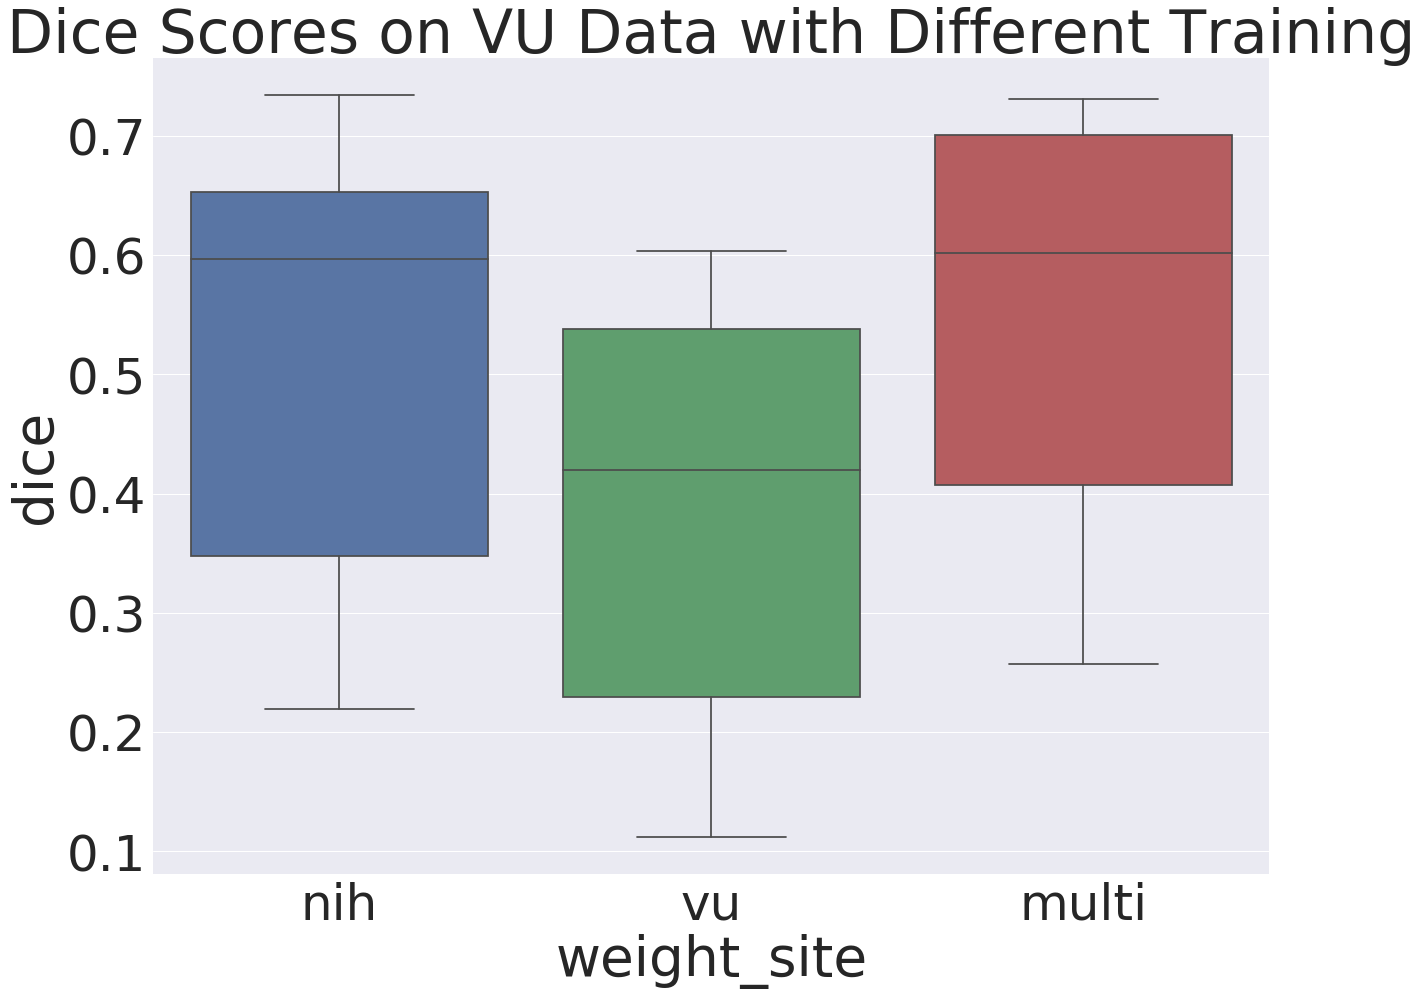

In [21]:
sns.set(font_scale=5)
ax = sns.boxplot(x="weight_site", y="dice", data=merged
                ).set_title("Dice Scores on VU Data with Different Training"
                )
fig = ax.get_figure()
fig.set_size_inches(20,15)
#fig.savefig("vu_data_boxplog.png")
fig.savefig("vu_data_boxplot.png")

In [83]:
# This will be the best way to show the Dice scores as a box plot in the end
#ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
#                 data=tips, palette="Set3")

In [84]:
from scipy.stats import wilcoxon

In [85]:
print("Wilcoxon between NIH weights, Multi weights")
print(wilcoxon(nih_df['dice'], multi_df['dice']))

Wilcoxon between NIH weights, Multi weights
WilcoxonResult(statistic=0.0, pvalue=0.011718685599768628)


/home/sam/miniconda3/envs/tf/lib/python3.5/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [86]:
print("Wilcoxon between VU weights, Multi weights")
print(wilcoxon(vu_df['dice'], multi_df['dice']))

Wilcoxon between VU weights, Multi weights
WilcoxonResult(statistic=11.0, pvalue=0.32698934959801507)


/home/sam/miniconda3/envs/tf/lib/python3.5/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
